### Code start here

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


class RBFnn:
    def __init__(self, X, y, center_method, sigma):
        self.X = X
        self.y = y
        self.center_method = center_method
        self.sigma = sigma
        self.centers = None
        self.w = None

    def square_distance(self, X1, X2):
        return np.dot((X1-X2).T, X1-X2)

    def fit(self):
        if self.center_method == 1:
            self.centers = self.X
        elif self.center_method == 2:
            idx = np.random.randint(self.X.shape[0], size=150)
            self.centers = self.X[idx, :]
        elif self.center_method == 3:
            kmeans = KMeans(n_clusters=150).fit(self.X)
            self.centers = kmeans.cluster_centers_

        G = np.array([[(1 / np.exp(-self.square_distance(x, c)/(2*(self.sigma**2)))) for c in self.centers] for x in self.X])
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(G.T, G)), G.T), self.y)

    def predict(self, X):
        y_pred = np.dot(np.array([[(1 / np.exp(-self.square_distance(x, c) / (2 * (self.sigma ** 2)))) for c in self.centers] for x in X]), self.w)
        return y_pred

    def mse(self, y, y_pred):
        N = y.shape[0]
        return np.dot((y_pred-y).T, (y_pred-y))[0][0] / N
    
    def get_acc(self, y, y_pred):
        corr = 0
        for i in range(0, len(y)):
            corr += 1 if (y[i] == y_pred[i]) else 0
        return corr / len(y)



### Prepare dataset

In [2]:
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)])
label = np.array([[1] if x[0]**2+x[1]**2 <= 1 else [-1] for x in data])
idx = np.random.permutation(data.shape[0])
data = data[idx]
label = label[idx]
split_idx = int(441*0.8)
train_data = data[:split_idx]
train_label = label[:split_idx]
test_data = data[split_idx:]
test_label = label[split_idx:]

### Q1

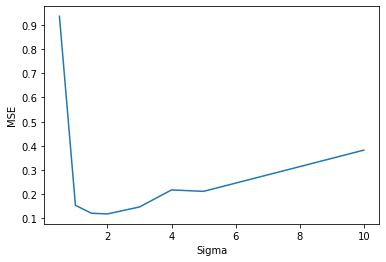

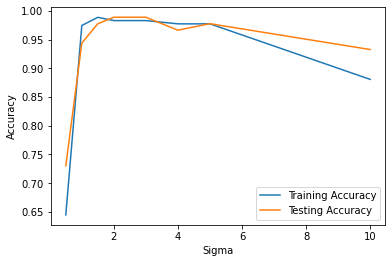

In [3]:
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 10]
mses = []
test_accs = []
train_accs = []
for sigma in sigmas:
    net = RBFnn(X=train_data, y=train_label, center_method=1, sigma=sigma)
    net.fit()
    # prediction on data
    y_pred = net.predict(train_data)
    mses.append(net.mse(train_label, y_pred))
    # get final output with binary
    y_output = np.where(y_pred < 0, -1, 1)
    train_accs.append(net.get_acc(train_label, y_output))
    y_pred = net.predict(test_data)
    y_output = np.where(y_pred < 0, -1, 1)
    test_accs.append(net.get_acc(test_label, y_output))
plt.figure()
plt.plot(sigmas, mses)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(sigmas, train_accs)
plt.plot(sigmas, test_accs)
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [4]:
print(mses)
print(train_accs)
print(test_accs)

[0.9356688417589732, 0.15446570568250234, 0.12165672689792893, 0.11888856747314284, 0.1476212299077261, 0.21810091320722239, 0.21207399308694122, 0.38242094488743034]
[0.6448863636363636, 0.9744318181818182, 0.9886363636363636, 0.9829545454545454, 0.9829545454545454, 0.9772727272727273, 0.9772727272727273, 0.8806818181818182]
[0.7303370786516854, 0.9438202247191011, 0.9775280898876404, 0.9887640449438202, 0.9887640449438202, 0.9662921348314607, 0.9775280898876404, 0.9325842696629213]


#### According to MSE, Sigma = 2 is the best option, MSE:  0.118889, Train Accuracy = 0.983, Test Accuracy = 0.989

### Q2(a)

In [8]:
net = RBFnn(X=train_data, y=train_label, center_method=2, sigma=2)
net.fit()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9857954545454546
0.9887640449438202


#### When use 150 random center, Train Accuracy is 0.986, Test Accuracy is 0.989

### Q2(b)

In [14]:
net = RBFnn(X=train_data, y=train_label, center_method=3, sigma=2)
net.fit()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9886363636363636
0.9887640449438202


#### When use 150 K-means center, Train Accuracy is 0.989Test Accuracy is 0.989